# Graduate Admission Prediction Model

Graduate Acceptance Dataset 
Estimate likelihood of candidate acceptance into graduate school. Performed EDA, linear & logistic regressions, along with a input function to predict candidate acceptance when given new data.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from pandas.util._decorators import Appender

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [44]:
df_v1 =pd.read_csv('Admission_Predict_Ver1.1.csv')
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis (EDA)

In [3]:
print(len(df)) #data entries
df.columns #ColumnHeads

400


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.isnull().sum() #missing data

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.columns = df.columns.str.replace(' ','') #removing space in columns names
df.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

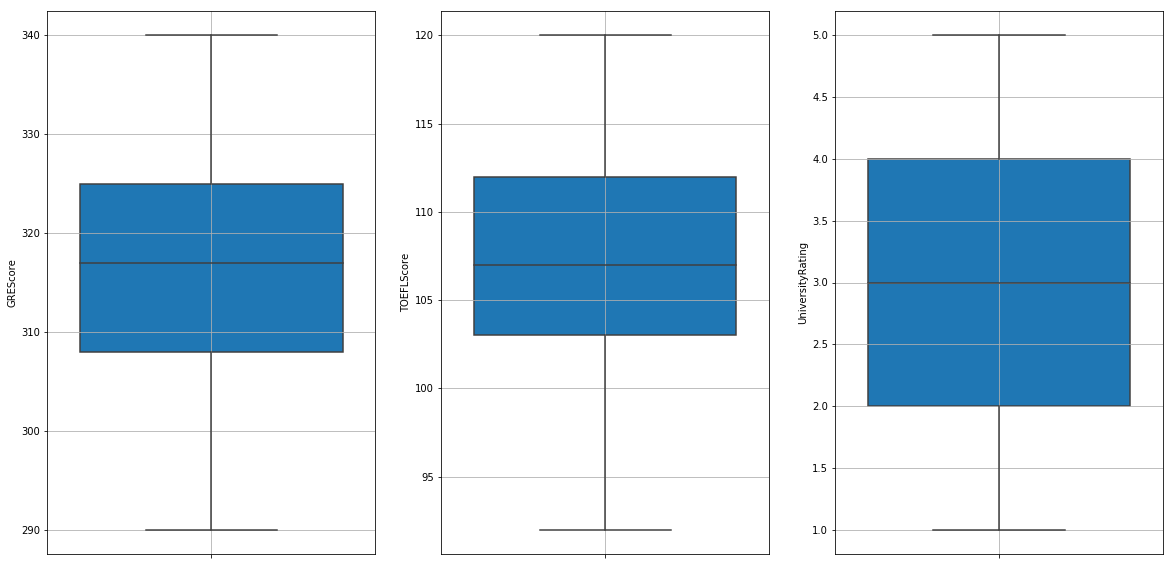

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x="GREScore",orient='v',data=df,saturation=1)
#sns.color_palette("light:#5A9")
plt.grid()

plt.subplot(1,3,2)
sns.boxplot(x="TOEFLScore",orient='v',data=df,saturation=1)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x="UniversityRating",orient='v',data=df,saturation=1)
plt.grid()

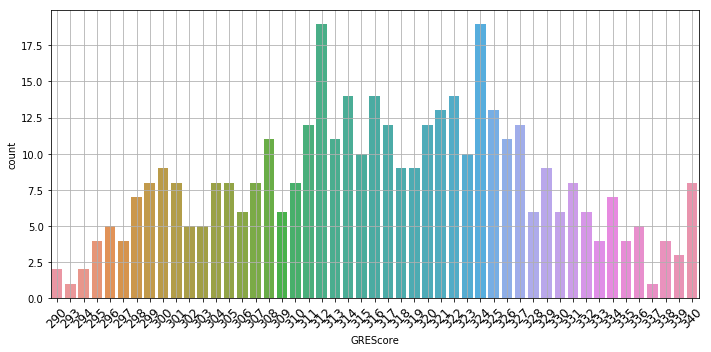

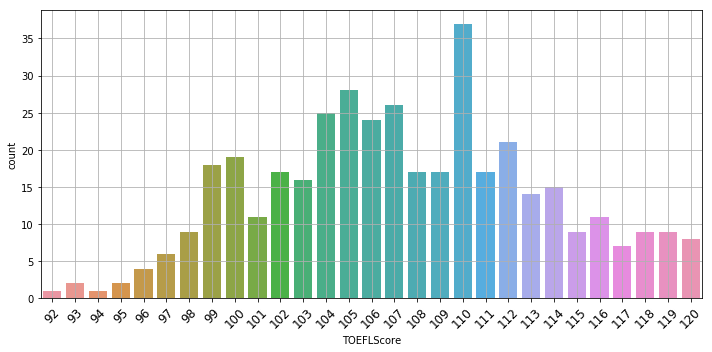

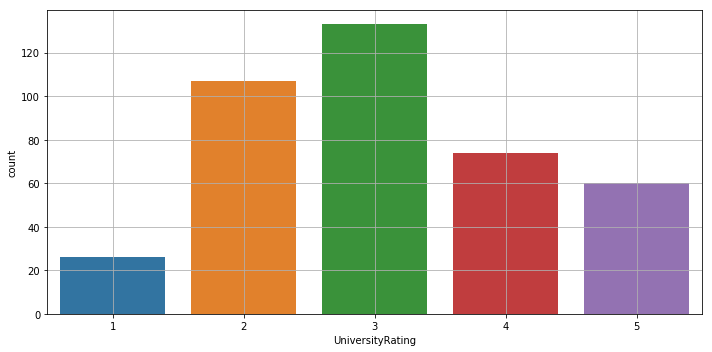

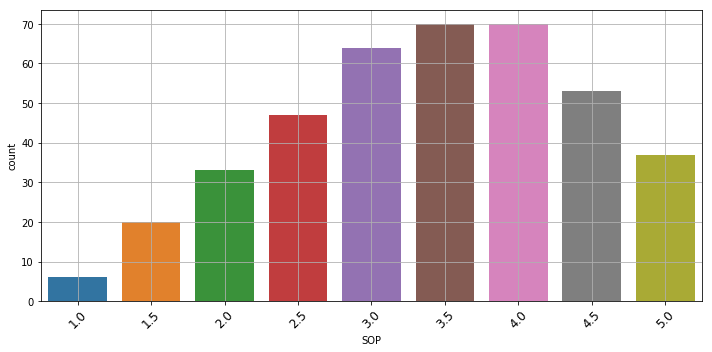

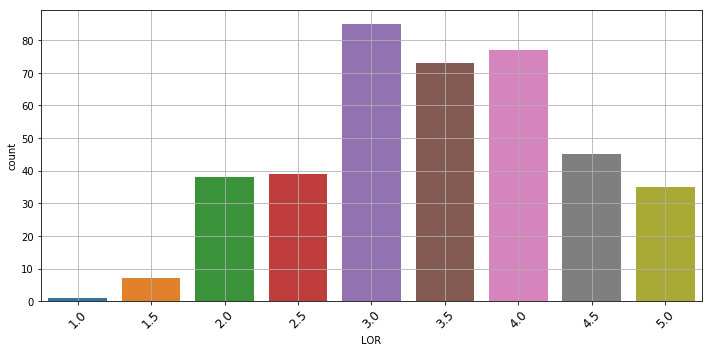

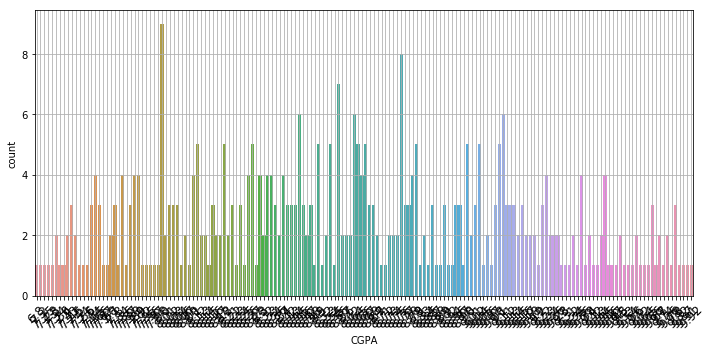

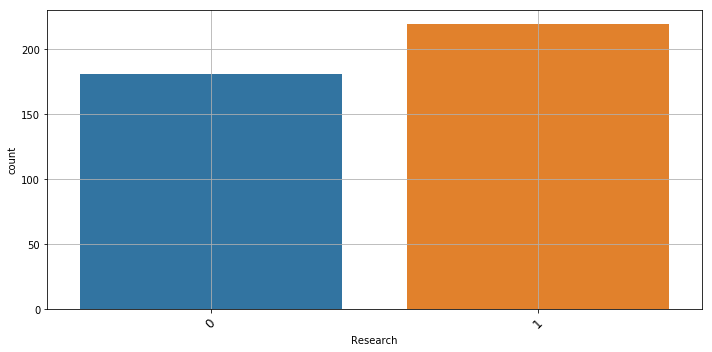

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='GREScore')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='TOEFLScore')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='UniversityRating')
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='SOP')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='LOR')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='CGPA')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Research')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

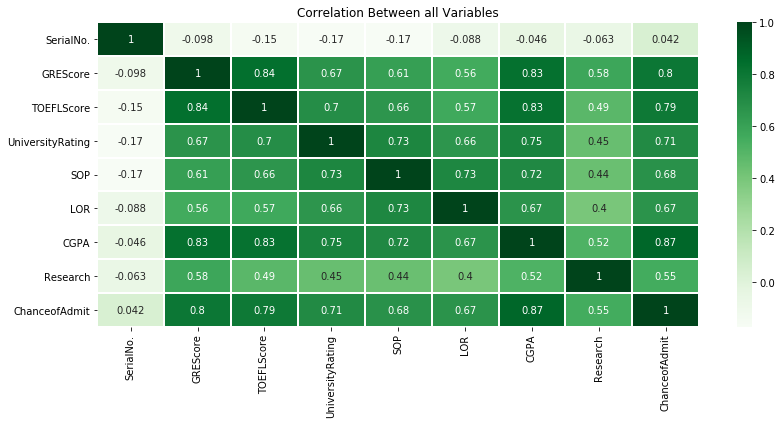

In [9]:
plt.figure(figsize=(12,6))
correlation = df.corr()
sns.heatmap(correlation, cmap="Greens",linewidths=1,annot=True) 
plt.title("Correlation Between all Variables")
plt.tight_layout()

In [10]:
#To find multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
vif_df = df.drop(['SerialNo.','ChanceofAdmit'], axis=1)
calc_vif(vif_df)

,variables,VIF
0,GREScore,1438.451789
1,TOEFLScore,1349.746948
2,UniversityRating,22.143705
3,SOP,38.050177
4,LOR,38.411722
5,CGPA,1080.491179
6,Research,2.859938


EDA SUMMARY
- Data Quality
    - No missing data
    - 400 Data points
    - No Outliers
- Analysis 
   - highly correlating variables (>0.7 reasons to assume multicollinearity) 
       - GREscore: Toefl score, CGPA
       - TOEFL: CGPA, UniversityRating
       - UniversityRating: CGPA, SOP
       - SOP: CGPA, LOR
   - Most features are normally distributed

## Data Preparation

In [12]:
x= df[['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]
y= df[['ChanceofAdmit']]

print(x.shape, y.shape)

(400, 7) (400, 1)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [14]:
df_copy = df.copy()
train_df = df_copy.sample(frac=0.7, random_state=0)
test_df = df_copy.drop(train_df.index)

In [15]:
print(len(x_train), len(train_df))

280 280


## Model Building
### Model 1 : Multiple Linear Regression with all variables

In [16]:
model1 = LinearRegression().fit(x_train,y_train)

In [17]:
rmse = math.sqrt(np.mean(((model1.predict(x_test)-y_test)**2)))
rmse

0.06275055848463834

In [18]:
model1.score(x_train,y_train)

0.7974225697174359

In [19]:
model1.intercept_

array([-1.36358482])

In [20]:
model1.coef_

array([[ 0.00223637,  0.00280676,  0.00188382, -0.00719684,  0.03197831,
         0.11323269,  0.02258162]])

Feature: 0, Score: 0.00224
Feature: 1, Score: 0.00281
Feature: 2, Score: 0.00188
Feature: 3, Score: -0.00720
Feature: 4, Score: 0.03198
Feature: 5, Score: 0.11323
Feature: 6, Score: 0.02258


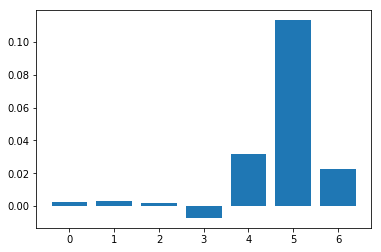

In [21]:
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Model 1 Summary
- Training,Testing: 70/30
- Model: ChanceofAdmit = -1.25613433 +0.00173157(GREScore) +0.00309982(TOEFLScore) +0.00464072(UniversityRating)-0.00581009(SOP) +0.02591985(LOR) +0.11651909(CGPA) + 0.02600234(Research)
- RMSE = 0.0607
- R score = 0.7928

### Model 2: R style, Ordinary Least Squares

In [22]:
model2 = smf.ols('ChanceofAdmit ~ GREScore+ TOEFLScore+ UniversityRating+ SOP+ LOR + CGPA+ Research',
                    data=train_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     144.6
Date:                Fri, 07 May 2021   Prob (F-statistic):           7.88e-88
Time:                        10:14:03   Log-Likelihood:                 378.33
No. Observations:                 280   AIC:                            -740.7
Df Residuals:                     272   BIC:                            -711.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2471      0.153     -8.166      0.000      -1.548      -0.946
GREScore             0.0019      0.001      2.559      0.011       0.000       0.003
TOEFLScore           0.0033      0.001      2.421      0.016       0.001       0.006
UniversityRating     0.0075      0.006      1.309      0.192      -0.004       0.019
SOP                 -0.0027      0.007     -0.400      0.690      -0.016       0.011
LOR                  0.0228      0.007      3.465      0.001       0.010       0.036
CGPA                 0.1075      0.015      7.192      0.000       0.078       0.137
Research             0.0249      0.010      2.580      0.010       0.006       0.044
==============================================================================
Omnibus:                       73.640   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.854
Skew:                          -1.298   Prob(JB):                     3.20e-35
Kurtosis:                       5.622   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
results2 = model2.predict(test_df)

In [24]:
rmse2 = np.sqrt(np.mean(((np.array(test_df['ChanceofAdmit'])-results2)**2)))
rmse2

0.06462099907808971

Model2 Summary
- Training,Testing: 70/30
- Model: ChanceofAdmit = -1.2471 +0.0019(GREScore) +0.0033(TOEFLScore) +0.0075(UniversityRating) -0.0027(SOP) +0.0228(LOR) +0.1075(CGPA) +0.0249(Research)
- RMSE = 0.0646
- R score = 0.788
- Adjusted R score = 0.783
- University Rating and SOP deemed insignificant

## Model3: OLS Removing non-significant variables

In [25]:
model3 = smf.ols('ChanceofAdmit ~ GREScore+ TOEFLScore+ LOR + CGPA+ Research',
                    data=train_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceofAdmit   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     202.3
Date:                Fri, 07 May 2021   Prob (F-statistic):           9.09e-90
Time:                        10:14:03   Log-Likelihood:                 377.45
No. Observations:                 280   AIC:                            -742.9
Df Residuals:                     274   BIC:                            -721.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2987      0.145     -8.968      0.000      -1.584      -1.014
GREScore       0.0019      0.001      2.597      0.010       0.000       0.003
TOEFLScore     0.0035      0.001      2.616      0.009       0.001       0.006
LOR            0.0239      0.006      4.140      0.000       0.013       0.035
CGPA           0.1110      0.014      7.923      0.000       0.083       0.139
Research       0.0255      0.010      2.661      0.008       0.007       0.044
==============================================================================
Omnibus:                       73.477   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.971
Skew:                          -1.297   Prob(JB):                     4.98e-35
Kurtosis:                       5.610   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
results3 = model3.predict(test_df)

In [27]:
rmse3 = np.sqrt(np.mean(((np.array(test_df['ChanceofAdmit'])-results3)**2)))
rmse3

0.06452052032761145

Model 3 Summary
- Training,Testing: 70/30
- Model: ChanceofAdmit = -1.2987 +0.0019(GREScore) +0.0035(TOEFLScore)+0.0239(LOR) +0.1110(CGPA) +0.0255(Research)
- RMSE = 0.06452
- R score = 0.787
- Adjusted R score = 0.783

## Linear Regression Model Comparison

In [28]:
cmap ={'0':"GREScore",'1': 'TOEFLScore', '2':'UniversityRating', '3':'SOP', '4':'LOR', '5':'CGPA', '6':'Research'}
x_test2 = x_test
x_test2.rename(columns=cmap)

x_test2.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [29]:
df2 = pd.DataFrame(y_test)
df2['Mod1']= model1.predict(x_test2)
df2['Mod2']= model2.predict(x_test2)
df2['Mod3']= model3.predict(x_test2)
df2.head()

,ChanceofAdmit,Mod1,Mod2,Mod3
208,0.64,0.618114,0.621681,0.625718
114,0.59,0.682430,0.691658,0.691093
213,0.96,0.962464,0.966746,0.965372
222,0.76,0.776540,0.781388,0.779977
168,0.64,0.587010,0.581348,0.580860


In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
error_table = pd.DataFrame({'Model':['Model1','Model2','Model3'],
                            'RMSE':[rmse,rmse2,rmse3],
                            'MAE':[mean_absolute_error(df2['ChanceofAdmit'],df2['Mod1']),mean_absolute_error(df2['ChanceofAdmit'],df2['Mod2']),mean_absolute_error(df2['ChanceofAdmit'],df2['Mod3'])],
                            'MAPE':[mean_absolute_percentage_error(df2['ChanceofAdmit'],df2['Mod1']),mean_absolute_percentage_error(df2['ChanceofAdmit'],df2['Mod2']),mean_absolute_percentage_error(df2['ChanceofAdmit'],df2['Mod3'])]})


error_table

,Model,RMSE,MAE,MAPE
0,Model1,0.062751,0.044618,7.129046
1,Model2,0.064621,0.042710,6.921438
2,Model3,0.064521,0.043246,6.984433


# Logistic Regression


In [32]:
#feature engineering binary acceptance column 
df3 = df

def acc_classifier(df3):
    if df3['ChanceofAdmit']>= 0.5:
        return '1'
    else:
        return '0'

df3['Acceptance']= df3.apply(acc_classifier, axis=1)
df3.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Acceptance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


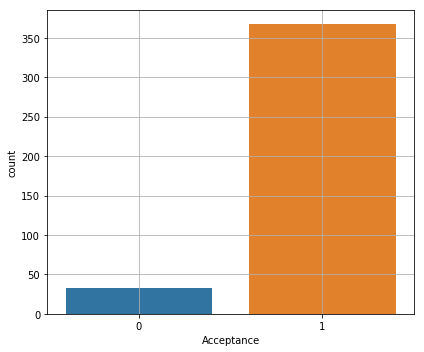

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(data=df3,x='Acceptance')
plt.grid()
plt.tight_layout()

In [34]:
X = df3[['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research']]
Y = df3[['Acceptance']]

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.3)
print(Xtrain.shape, Ytrain.shape)

(280, 7) (280, 1)


In [35]:
model4 = LogisticRegression().fit(Xtrain, Ytrain)
#model4.score
#rmse = math.sqrt(np.mean(((model1.predict(x_test)-y_test)**2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(model4.coef_ ,
model4.intercept_)

[[-0.0919846   0.16230521 -0.25420097 -0.24102199  1.08373833  1.49358817
   1.06495654]] [-0.4170644]


Feature: 0, Score: -0.09198
Feature: 1, Score: 0.16231
Feature: 2, Score: -0.25420
Feature: 3, Score: -0.24102
Feature: 4, Score: 1.08374
Feature: 5, Score: 1.49359
Feature: 6, Score: 1.06496


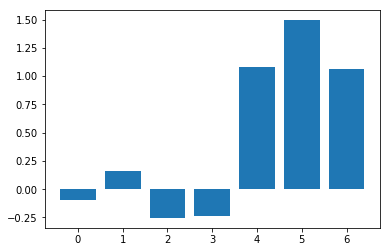

In [37]:
importance4 = model4.coef_[0]
#summarize feature importance
for i,v in enumerate(importance4):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance4))], importance4)
pyplot.show()

In [38]:
results4 = model4.predict(Xtest)
results4

array(['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1'], dtype=object)

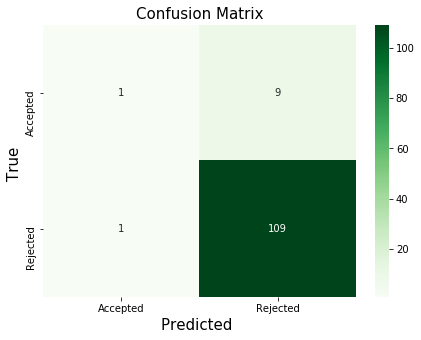

In [40]:
cm = confusion_matrix(Ytest,results4)
df_cm = pd.DataFrame(cm, columns=['Accepted','Rejected'], index =['Accepted','Rejected'])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, cmap='Greens' , annot=True, fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted ",fontsize=15)
plt.ylabel("True ",fontsize=15)
plt.show()

In [41]:
accuracy_score(Ytest,results4)

0.9166666666666666

# Analysis Summary
In all, an interested graduate candidate could be advised that above all their undergraduate college GPA will have the greatest significant effect on their chances of admission into a given grad program. Model 4 was able to correctly the admission status of 91.6% of tested candidates. 

# Input Function
- Take in the candidate information and return expected admission status
- Using Model 4 (Best Performing)

In [42]:
def graduate_acceptance_estimator():
    GRE = int(input("Enter GRE Score"))
    TOEFL = int(input("Enter TOEFL score"))
    RATING = float(input("Please Enter School Rating"))
    SOP = float(input ('Please enter Statement of Purpose and Letter of Recommendation Strength ( out of 5 )'))
    LOR= float(input("Enter LOR"))
    CGPA= float(input("Enter CGPA"))
    RESEARCH = input("Have you done research?")
    
    Research=0
    if RESEARCH in  ("YES", "yes", "Yes"):
        Research += 1
    elif RESEARCH in ("no", "NO" , "No"):
        Research += 0
        
    feats = np.array([[GRE,TOEFL,RATING,SOP,LOR,CGPA,Research]])
    
    output= model4.predict(feats)
    
    #return output[0]
    if int(output[0]) >=0.5:
        return "Accepted!"
    else:
        return "I'm sorry, you will most likely not be accepted"
    

    

In [43]:
graduate_acceptance_estimator()

Enter GRE Score337
Enter TOEFL score118
Please Enter School Rating4
Please enter Statement of Purpose and Letter of Recommendation Strength ( out of 5 )4.5
Enter LOR4.5
Enter CGPA9.65
Have you done research?yes


'Accepted!'